# k-means Clustering

## Table of contents (Inhaltsverzeichnis erstellen)

[1.) Simple k-means clustering example](#section_1)<br>
[2.) Image segmentation](#section_2)<br>
[3.) 3D point cloud segmentation](#section_3)<br>
[4.) Finding clusters in the apartment data](#section_4)

## Libraries and settings

In [1]:
# Required:
!pip install opencv-python
!pip install plyfile 

# Libraries
import os
import cv2
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Current activated conda environment (aktuelles Envirement, dass man implementiert hat)
env = !conda info | grep 'active env'
print('Current activated conda environment:', str(env[0]).strip())

#Current working directory
print('\nCurrent working directory:', os.getcwd())

Current activated conda environment: Der Befehl "grep" ist entweder falsch geschrieben oder

Current working directory: C:\Workspacezhaw\data_analytics\Woche 10


## 1.) Simple k-means clustering example
<a id='section_1'></a>

### Create the dataset

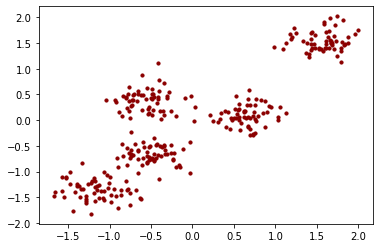

In [2]:
# Create data
centers = [[2,1], [-2,2], [-2,-2], [-4,-5], [5,7]]
X, y = make_blobs(n_samples=300, 
                  centers=centers, 
                  cluster_std=0.8,
                  random_state=42)

# Normalization of the values
X = StandardScaler().fit_transform(X)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], s=10, color='darkred')
plt.show()

### Elbow Method showing the optimal k

In [3]:
list(range(1,16,1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

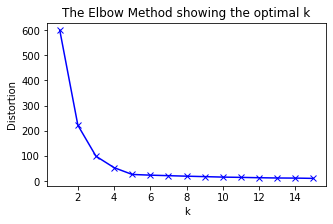

In [4]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,16,1)

# Loop to find the optimal k - 15 Teilmodelle 
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot (man nimmt den Elbow-point als optimale Anzahl der Cluster)
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()
# Man sollte den Punkt herauslesen, an dem es fast keine Verbesserung mehr gibt => ab 5 (in diesem Beispiel k = 5)

#### Aufgabe 1c
Man sollte den Punkt herauslesen, an dem fast keine Verbesserung mehr möglich ist. In diesem Fall => ungefähr ab 5 (k = 5)

### Perform k-means clustering

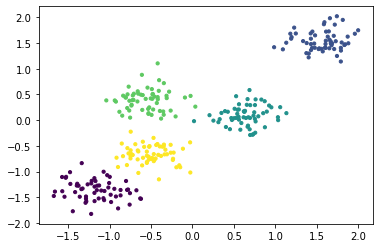

array([3, 2, 0, 4, 3, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0, 3, 3, 3, 3, 3, 1, 1,
       2, 1, 0, 4, 0, 4, 0, 0, 2, 0, 0, 1, 0, 2, 3, 0, 4, 2, 0, 4, 1, 2,
       1, 1, 0, 4, 1, 0, 2, 2, 1, 0, 3, 4, 1, 2, 4, 1, 3, 4, 3, 4, 1, 4,
       1, 3, 0, 0, 4, 4, 2, 4, 1, 0, 2, 1, 2, 2, 4, 2, 3, 0, 1, 1, 2, 1,
       2, 2, 4, 0, 3, 1, 4, 0, 4, 2, 2, 2, 2, 3, 0, 0, 3, 2, 4, 2, 0, 1,
       4, 4, 0, 2, 0, 4, 0, 2, 1, 0, 3, 3, 2, 2, 3, 2, 3, 1, 2, 2, 2, 3,
       1, 1, 1, 0, 2, 3, 0, 2, 4, 3, 3, 4, 3, 2, 1, 4, 0, 2, 3, 4, 0, 0,
       3, 2, 4, 1, 3, 1, 4, 2, 3, 3, 2, 3, 0, 3, 1, 1, 0, 3, 4, 1, 1, 2,
       0, 4, 3, 1, 4, 2, 4, 0, 1, 0, 4, 0, 3, 4, 1, 3, 0, 2, 2, 4, 4, 2,
       1, 4, 0, 4, 2, 3, 0, 4, 4, 1, 1, 3, 0, 1, 0, 0, 3, 3, 1, 0, 3, 3,
       3, 0, 2, 0, 3, 4, 1, 4, 1, 1, 4, 4, 3, 0, 4, 0, 1, 4, 1, 4, 3, 0,
       1, 4, 2, 3, 4, 0, 1, 4, 1, 1, 3, 3, 2, 1, 3, 4, 3, 0, 4, 4, 2, 2,
       0, 3, 3, 1, 1, 0, 2, 2, 3, 3, 4, 4, 4, 1, 2, 0, 3, 4, 0, 2, 0, 4,
       3, 1, 2, 4, 3, 1, 1, 1, 1, 3, 3, 4, 4, 2])

In [5]:
# Number of clusters
k = 5

# k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42).fit(X) #kmeans => Name des Modells

# Predict the values
y2 = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y2, s=10)
plt.show()

#Durchnummerierung der einzelnen Cluster (Pyhton fängt immer bei 0 an...) - aus dieser Matrix werden die Info/Vektoren genommen und als Farbe definnert
y2


### Get and check the converged cluster centroids

In [6]:
# Print centroids
centroids = kmeans.cluster_centers_ #kmeans = Name des Models , cluster_centers = zentrierte Cluster
print('Cluster centroids:')
print(centroids, '\n')

# Check the 1st cluster's centroid 'by hand' (Nachrechnen, siehe unten array)
clust_00 = X[y2 == 0]
print('The 1st cluster\'s centroid:')
print(f'x = {sum(clust_00[:,0]/len(clust_00[:,0])):.8f}')
print(f'y = {sum(clust_00[:,1]/len(clust_00[:,1])):.8f}')

# array mit allen Punkten mit den entsprechenden Daten => hier kann man den die Summe ausrechnen und geteilt durch Zeilenazahl als Überprüfung des Zentroids
clust_00

Cluster centroids:
[[-1.16214999 -1.36217282]
 [ 1.56276666  1.54186443]
 [ 0.64167824  0.09023659]
 [-0.55467879  0.3889481 ]
 [-0.49867406 -0.67040574]] 

The 1st cluster's centroid:
x = -1.16214999
y = -1.36217282


array([[-1.12495235, -1.27191811],
       [-0.98093471, -1.59417469],
       [-1.35876759, -1.4909064 ],
       [-1.07331462, -1.52021947],
       [-0.62983644, -1.5239277 ],
       [-0.75361372, -1.42202346],
       [-1.56911482, -1.38398208],
       [-1.33913985, -1.34349232],
       [-1.02776227, -1.07171208],
       [-1.39432737, -1.27396133],
       [-1.32467105, -1.33099077],
       [-1.13046141, -1.52504094],
       [-0.92277204, -1.48648488],
       [-1.44243702, -1.77399051],
       [-1.16951642, -1.18527224],
       [-1.37306242, -1.27634566],
       [-1.28339662, -1.52894617],
       [-1.414273  , -1.40105391],
       [-1.65778268, -1.39058267],
       [-1.21488672, -1.18204224],
       [-1.071015  , -1.00419058],
       [-1.2198656 , -1.23198634],
       [-1.1482812 , -1.27515046],
       [-1.52328022, -1.10432241],
       [-1.06496458, -1.55784893],
       [-0.62091741, -1.53197894],
       [-1.00466852, -1.22412881],
       [-1.06071039, -1.37948901],
       [-0.89646815,

### Get the inertia or 'within-cluster sum-of-squares (WCSS)' of the k-means model

In [7]:
print(f'Within-cluster sum-of-squares: {kmeans.inertia_:.4f}')

Within-cluster sum-of-squares: 26.3487


### Perform Silhouette Analysis
- For examples see:
- https://laid-back-scientist.com/en/k-means
- https://machinelearninggeek.com/evaluating-clustering-methods
- https://medium.com/@favourphilic/how-to-interpret-silhouette-plot-for-k-means-clustering-414e144a17fe

k=2, Silhouette Score: 0.5325


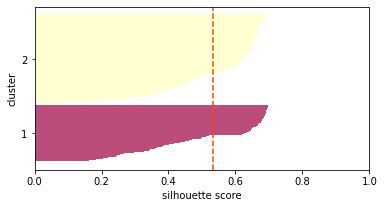

k=3, Silhouette Score: 0.5659


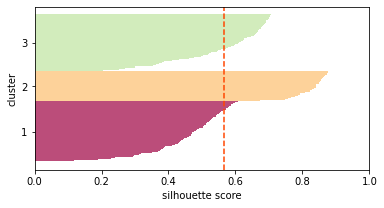

k=4, Silhouette Score: 0.6257


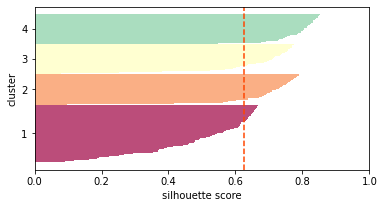

k=5, Silhouette Score: 0.6597


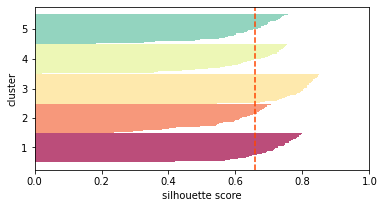

k=6, Silhouette Score: 0.6110


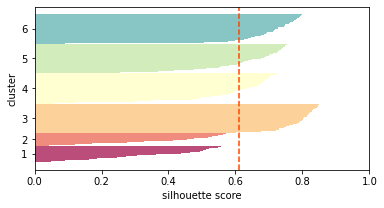

k=7, Silhouette Score: 0.5564


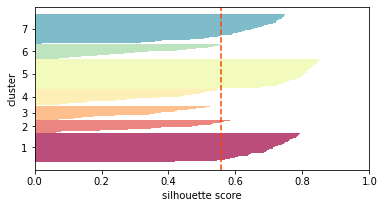

k=8, Silhouette Score: 0.4964


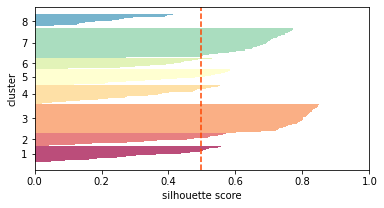

k=9, Silhouette Score: 0.4772


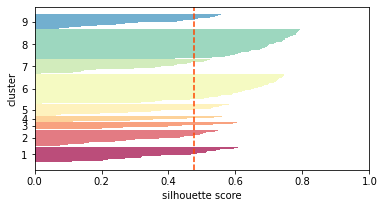

k=10, Silhouette Score: 0.4118


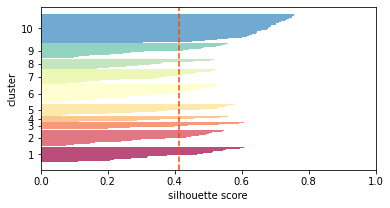

k=11, Silhouette Score: 0.3447


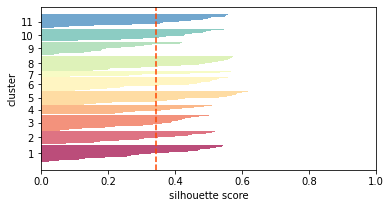

In [8]:
#Silhoutetten-Analyse : Welches k ist sinnvoll?
# Import own module for Silhouette plots
from silhouette import *

# Create Silhouette plots for different k's
# Note: range(2,12,1) provides: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for i in[2,3,4,5,6,7,8,9,10,11]: # for i in range(2,12,1):von 2-12 in 1er-schritten 
    model = KMeans(n_clusters=i, 
                   random_state=42, 
                   init='random')
    model.fit(X)
    print(f'k={i}, Silhouette Score: {silhouette_score(X, model.labels_):.4f}')
    plt.figure(figsize=(6,3))
    show_silhouette(X=X, fitted_model=model)
    
#für jeden Punkt ein Silhoutten-Score möglich (Verhältnis aus dem eigenen Cluster zu den näcshten Cluster-Punkten) - man kann für jeden Datenpunkt ein Strich zeichnen 
# Je grösser der Wert, der zur roten Linie passt, (Silhouette Score), desto besser genauer (k = 5 , man will nahe bei 5 landen)

## 2.) Image segmentation
<a id='section_2'></a>

### Aufgabe 1e

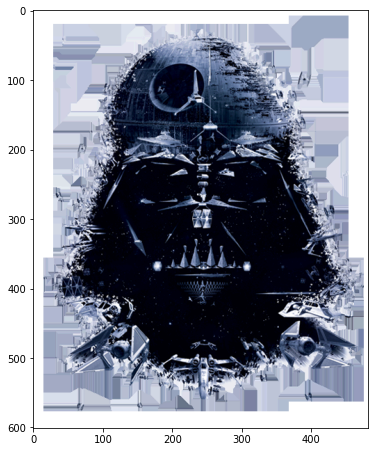

In [9]:
# Read the image
image = cv2.imread('starwars.jpg')
 
# Change the color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(6,8))
plt.imshow(image)

#über google-image search ein jpg suchen
# mit cv2 image muss man das Format nicht angeben - erkennt automatisch
# Bilddatei einlesen und Umformen in Reshape 

In [10]:
# Reshaping the image into a 2D array of pixels and RGB colors
pixel_vals = image.reshape((-1,3))
 
# Convert to float
pixel_vals = np.float32(pixel_vals)
pixel_vals

#Arrays mit RGB-Werten

array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       ...,
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.]], dtype=float32)

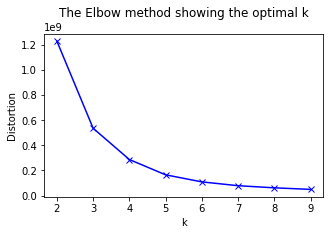

In [11]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(2,10,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pixel_vals)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow method showing the optimal k')

plt.show()

# Aufgabe 1f: k = 6-8

### Aufgabe 1g

In [12]:
# Number of clusters
k = 7

# Criteria for the segmentation algorithm to stop running
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# Perform k-means clustering
retval, labels, centers = cv2.kmeans(pixel_vals, 
                                     k, 
                                     None, 
                                     criteria, 
                                     10, 
                                     cv2.KMEANS_RANDOM_CENTERS)

# Print cluster labels
print('Cluster labels:')
print(labels, '\n')

# Print cluster centroids
print(f'Centroids of {k} clusters')
print(centers)

Cluster labels:
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]] 

Centroids of 7 clusters
[[251.67409   251.96326   253.25934  ]
 [ 30.877316   43.809914   68.8759   ]
 [ 77.33551    91.75048   121.46942  ]
 [123.99877   135.84764   165.30115  ]
 [162.46625   172.09708   196.74297  ]
 [  0.8777174   1.8928051  14.186454 ]
 [200.32549   205.93552   223.37582  ]]


In [13]:
# Number of clusters
k = 2

# Criteria for the segmentation algorithm to stop running
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# Perform k-means clustering
retval, labels, centers = cv2.kmeans(pixel_vals, 
                                     k, 
                                     None, 
                                     criteria, 
                                     10, 
                                     cv2.KMEANS_RANDOM_CENTERS)

# Print cluster labels
print('Cluster labels:')
print(labels, '\n')

# Print cluster centroids
print(f'Centroids of {k} clusters')
print(centers)

Cluster labels:
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]] 

Centroids of 2 clusters
[[ 14.316765  18.916542  35.39838 ]
 [196.07957  201.9036   217.63141 ]]


In [14]:
# Number of clusters
k = 4

# Criteria for the segmentation algorithm to stop running
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# Perform k-means clustering
retval, labels, centers = cv2.kmeans(pixel_vals, 
                                     k, 
                                     None, 
                                     criteria, 
                                     10, 
                                     cv2.KMEANS_RANDOM_CENTERS)

# Print cluster labels
print('Cluster labels:')
print(labels, '\n')

# Print cluster centroids
print(f'Centroids of {k} clusters')
print(centers)

Cluster labels:
[[3]
 [3]
 [3]
 ...
 [3]
 [3]
 [3]] 

Centroids of 4 clusters
[[  4.697698   7.485713  21.621885]
 [173.6864   181.7472   204.45956 ]
 [ 89.45248  103.17787  132.72635 ]
 [244.1934   245.4456   249.0909  ]]


In [15]:
# Number of clusters
k = 5

# Criteria for the segmentation algorithm to stop running
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# Perform k-means clustering
retval, labels, centers = cv2.kmeans(pixel_vals, 
                                     k, 
                                     None, 
                                     criteria, 
                                     10, 
                                     cv2.KMEANS_RANDOM_CENTERS)

# Print cluster labels
print('Cluster labels:')
print(labels, '\n')

# Print cluster centroids
print(f'Centroids of {k} clusters')
print(centers)

Cluster labels:
[[2]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]] 

Centroids of 5 clusters
[[  2.1288106   3.9442048  17.028276 ]
 [ 53.63017    67.69197    95.5148   ]
 [248.16328   248.92508   251.4074   ]
 [129.05942   140.6705    169.45763  ]
 [186.11824   193.22824   213.51895  ]]


array([[248, 248, 251],
       [248, 248, 251],
       [248, 248, 251],
       ...,
       [248, 248, 251],
       [248, 248, 251],
       [248, 248, 251]], dtype=uint8)

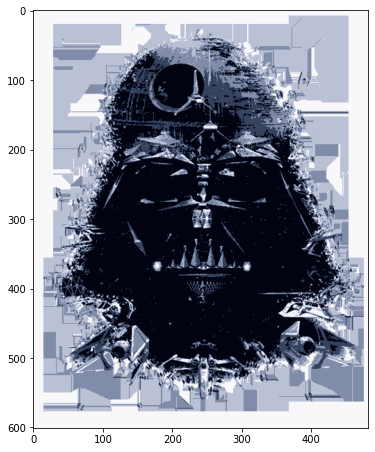

In [16]:
#Auf array-Daten anwenden und neu einfärben und für jedes Cluster, dass man angewendet hat, verteilt man Farbwerte
# Convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

# Show result
plt.figure(figsize=(6,8))
plt.imshow(segmented_image)

#array
segmented_data
#WICHTIG: braucht keine Labels!!! => Clustering

## Dozenten-Beispiel

### Read the image

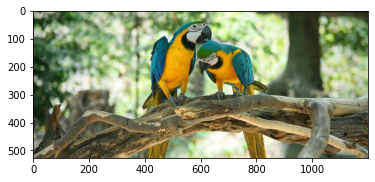

In [17]:
# Read the image
image = cv2.imread('parrot.jpg')
 
# Change the color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(6,8))
plt.imshow(image)

#über google-image search ein jpg suchen
# mit cv2 image muss man das Format nicht angeben - erkennt automatisch
# Bilddatei einlesen und Umformen in Reshape 

### Reshape the image

In [18]:
# Reshaping the image into a 2D array of pixels and RGB colors
pixel_vals = image.reshape((-1,3))
 
# Convert to float
pixel_vals = np.float32(pixel_vals)
pixel_vals

#Arrays mit RGB-Werten

array([[ 37.,  68.,  37.],
       [ 37.,  70.,  39.],
       [ 43.,  76.,  45.],
       ...,
       [102., 112., 113.],
       [102., 114., 114.],
       [102., 114., 114.]], dtype=float32)

### Elbow method showing the optimal k

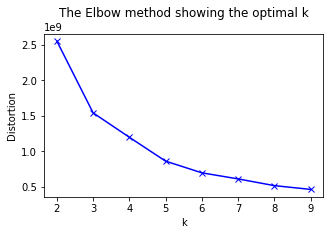

In [19]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(2,10,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pixel_vals)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow method showing the optimal k')

plt.show()

#geht langsamer zum optimalen Wert (hier ist sogar k=7 gar keine schlechte Wahl mehr , wir arbeiten trotzdem mti k=5 weiter)

### Perform image segmentation

In [20]:
# Number of clusters
k = 5

# Criteria for the segmentation algorithm to stop running
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# Perform k-means clustering
retval, labels, centers = cv2.kmeans(pixel_vals, 
                                     k, 
                                     None, 
                                     criteria, 
                                     10, 
                                     cv2.KMEANS_RANDOM_CENTERS)

# Print cluster labels
print('Cluster labels:')
print(labels, '\n')

# Print cluster centroids
print(f'Centroids of {k} clusters')
print(centers)

Cluster labels:
[[3]
 [3]
 [3]
 ...
 [4]
 [4]
 [4]] 

Centroids of 5 clusters
[[217.72884  229.55383  192.66039 ]
 [161.67653  176.29742  131.45851 ]
 [206.22427  142.7031    10.61303 ]
 [ 53.723587  63.103184  40.451107]
 [104.846344 113.094124  78.57686 ]]


### Change data types and reshape the segmented data for vizualization

array([[ 53,  63,  40],
       [ 53,  63,  40],
       [ 53,  63,  40],
       ...,
       [104, 113,  78],
       [104, 113,  78],
       [104, 113,  78]], dtype=uint8)

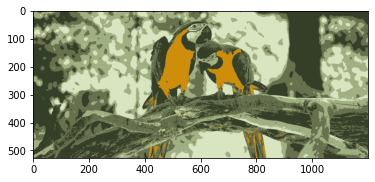

In [21]:
#Auf array-Daten anwenden und neu einfärben und für jedes Cluster, dass man angewendet hat, verteilt man Farbwerte
# Convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

# Show result
plt.figure(figsize=(6,8))
plt.imshow(segmented_image)

#array
segmented_data
#WICHTIG: braucht keine Labels!!! => Clustering

## 3.) 3D point cloud segmentation
- For details see: https://towardsdatascience.com/3d-point-cloud-clustering-tutorial-with-k-means-and-python-c870089f3af8
- Data-Viewer: https://app.flyvast.com/flyvast/app/page-snapshot-viewer.html#/444/9b557b91-8f41-16fa-cd2d-3476a1756611
<a id='section_3'></a>

### Import the data (Airport LIDAR point cloud dataset)

In [22]:
# Import the data
data = "KME_planes.xyz"
# ilumince = helligkeitswert.. etc. =>  ausgefilterte Daten)
x, y, z, illuminance, reflectance, intensity, nb_of_returns = np.loadtxt(data,
                                                                         skiprows=1, 
                                                                         delimiter=';', 
                                                                         unpack=True)
# Array with positions of points
pcd = np.column_stack((x,y,z))

# Mean of z-variable (height above ground)
print(np.mean(z).round(4))

# Subset of the point cloud 
mask = (z > np.mean(z)) & (x <= 320) & (x >= 230)
spatial_query = pcd[mask]
spatial_query.shape

5.2829


(9676, 3)

### 3D plot of the point cloud subset

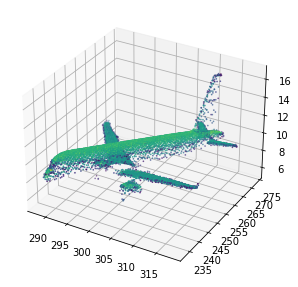

In [23]:
# 3D plot of the subset
plt.figure(figsize=(5,5))
ax = plt.axes(projection ='3d')
ax.scatter(x[mask], y[mask], z[mask], c=intensity[mask], s=0.5) #intensity (=Farbwerte), eigentlich nicht notwendig, kann man auch herausnehmen
plt.show()

### 2D plot of the point cloud subset

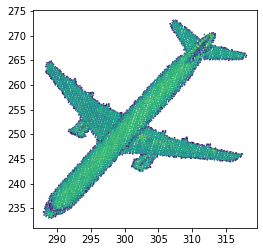

In [24]:
# 2D plot of the subset (2d Bild mit nur x und y)
plt.figure(figsize=(4,4))
plt.scatter(x[mask], y[mask], c=intensity[mask], s=0.5)
plt.show()

### Elbow method showing the optimal k

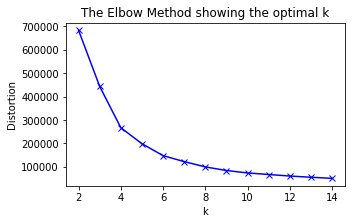

In [25]:
# Sum of squared distances of samples to their closest cluster center (Elbogen-MEthode wieder anwenden)
distortions = []

# Range of k's (key = Anzahl der Cluster, die man später als Ergbnis haben möchte - sonst anderer Anwendungsfall! Prüfung)
K = range(2,15,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(spatial_query)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

### Point cloud segmentation based on k-means clustering

In [26]:
# Define number of clusters
k = 5

# Stack with x,y,z values
X2 = np.column_stack((x[mask], y[mask], z[mask]))

# Perform k-means clustering
kmeans_aerpl = KMeans(n_clusters=k, random_state=42).fit(X2)

### 2D plot of the segmented point cloud

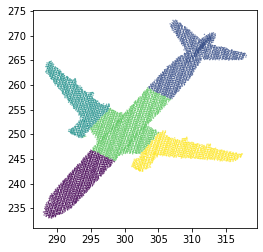

In [27]:
# 2D plot of image segmentation (für k=5)
plt.figure(figsize=(4,4))
plt.scatter(x[mask], y[mask], c=kmeans_aerpl.labels_, s = 0.1)
plt.show()

# Zweck: Siedlungsflächen segmentierung auf einem Zweidimensionalen Bild (ohne Labels werden nur mit x,y,z Daten alle Dots zugewiesen)
# Auf Basis DER Ähnlichkeit von Punkten könnte man jetzt auch bei einem Haus Fenster und Türen erkennen etc.

### 3D plot of the segmented point cloud

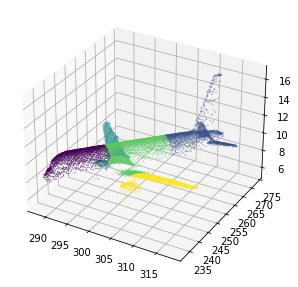

In [28]:
# 3D plot of image segmentation
plt.figure(figsize=(5,5))
ax = plt.axes(projection ='3d')
ax.scatter(x[mask], y[mask], z[mask], c=kmeans_aerpl.labels_, s=0.1)
plt.show()

### Calculate the Silhouette Score

In [29]:
print(f'Silhouette Score: {silhouette_score(X2, kmeans_aerpl.labels_):.4f}')

Silhouette Score: 0.4703


### Aufgabe h

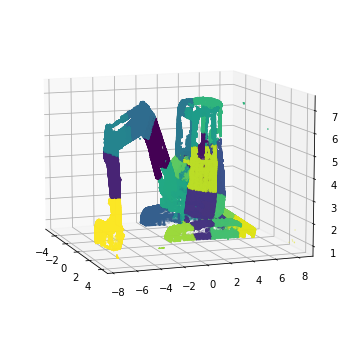

In [30]:
from plyfile import PlyData, PlyElement

def read_ply(filename):
    plydata = PlyData.read(filename)
    x = np.asarray(plydata.elements[0].data['x'])
    y = np.asarray(plydata.elements[0].data['y'])
    z = np.asarray(plydata.elements[0].data['z'])
    return np.stack([x,y,z], axis=1)

data = read_ply('excavator.ply')
x = data[:,0]
y = data[:,1]
z = data[:,2]

mask = z > 1.0

# Stack with x,y,z values
X4 = np.column_stack((x[mask], y[mask], z[mask]))

# Perform k-means clustering
k = 21
kmeans_cran = KMeans(n_clusters=k, random_state=42).fit(X4)

# 3D plot of image segmentation
plt.figure(figsize=(6,6))
ax = plt.axes(projection ='3d')
ax.view_init(10, -20)
ax.scatter(x[mask], y[mask], z[mask], c=kmeans_cran.labels_, s=0.05)
plt.show()

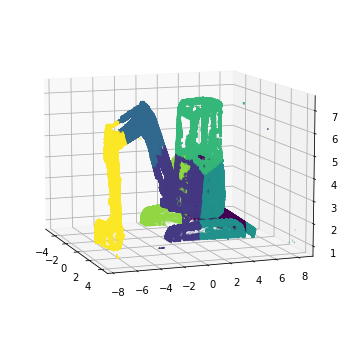

In [31]:
from plyfile import PlyData, PlyElement

def read_ply(filename):
    plydata = PlyData.read(filename)
    x = np.asarray(plydata.elements[0].data['x'])
    y = np.asarray(plydata.elements[0].data['y'])
    z = np.asarray(plydata.elements[0].data['z'])
    return np.stack([x,y,z], axis=1)

data = read_ply('excavator.ply')
x = data[:,0]
y = data[:,1]
z = data[:,2]

mask = z > 1.0

# Stack with x,y,z values
X4 = np.column_stack((x[mask], y[mask], z[mask]))

# Perform k-means clustering
k = 7
kmeans_cran = KMeans(n_clusters=k, random_state=42).fit(X4)

# 3D plot of image segmentation
plt.figure(figsize=(6,6))
ax = plt.axes(projection ='3d')
ax.view_init(10, -20)
ax.scatter(x[mask], y[mask], z[mask], c=kmeans_cran.labels_, s=0.05)
plt.show()

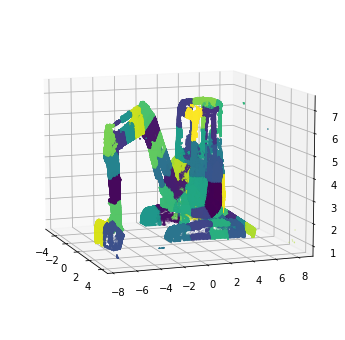

In [32]:
from plyfile import PlyData, PlyElement

def read_ply(filename):
    plydata = PlyData.read(filename)
    x = np.asarray(plydata.elements[0].data['x'])
    y = np.asarray(plydata.elements[0].data['y'])
    z = np.asarray(plydata.elements[0].data['z'])
    return np.stack([x,y,z], axis=1)

data = read_ply('excavator.ply')
x = data[:,0]
y = data[:,1]
z = data[:,2]

mask = z > 1.0

# Stack with x,y,z values
X4 = np.column_stack((x[mask], y[mask], z[mask]))

# Perform k-means clustering
k = 50
kmeans_cran = KMeans(n_clusters=k, random_state=42).fit(X4)

# 3D plot of image segmentation
plt.figure(figsize=(6,6))
ax = plt.axes(projection ='3d')
ax.view_init(10, -20)
ax.scatter(x[mask], y[mask], z[mask], c=kmeans_cran.labels_, s=0.05)
plt.show()

K ist die Anzahl der Farbwerte, welche auf Basis der Ähnlichkeiten zugeteilt werden. Wird sie erhöht. So wird der Bagger in seine unterschiedlichsten Teile eingeteilt.

## 4.) Finding clusters in the apartment data
<a id='section_4'></a>

### Import the apartment data

In [33]:
# Dasselbe kann man auch auf die Apartement Data anwenden
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'tax_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print(df.shape)
df.head(5)

(804, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,tax_income,dist_supermarket
0,1662023695-433,"Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",3.5,122,1,3180,26.07,47.255714,8.804976,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,317.117916
1,1662023720-634,"Blumenbergstrasse 7, 8633 Wolfhausen, ZH",4.0,87,0,1690,19.43,47.254879,8.793746,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,612.612674
2,1662023745-834,"8608 Bubikon, ZH",3.5,92,0,2350,25.54,47.277386,8.800306,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,2269.090923
3,1662023701-503,"8608 Bubikon, ZH",3.5,130,0,2500,19.23,47.277386,8.800306,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,2269.090923
4,1662023745-820,"Lavaterstr. 63, 8002 Zürich, ZH",2.5,78,0,3760,48.21,47.361378,8.533339,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.73770,349.937421


### Subset of the apartment data frame for k-means clustering

In [34]:
# Define a subset of the data frame for k-means clustering (auf Basis von Räumen, Fläche und m2 als Parameter)
X3 = df[['rooms',
         'area',
        'price_per_m2']]
#das ist alles in x3:
X3

,rooms,area,price_per_m2
0,3.5,122,26.07
1,4.0,87,19.43
2,3.5,92,25.54
3,3.5,130,19.23
4,2.5,78,48.21
...,...,...,...
865,4.5,136,19.19
866,4.5,85,20.12
867,3.5,94,27.66
868,4.5,115,22.43


### Elbow method showing the optimal k

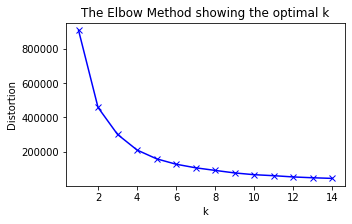

In [35]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,15)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X3)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()
#Elbow-method ab 5-7 sinnvoll

### Perform k-means clustering on the apartment data

In [36]:
# Number of cluters
k = 5

# Perform k-means clustering
kmeans_apmts = KMeans(n_clusters=k, random_state=42).fit(X3)

# Add the clusters to data frame
X3['cluster'] = kmeans_apmts.predict(X3)

# Show number of apartments per cluster
X3['cluster'].value_counts().sort_values(ascending=False)


kmeans_apmts.inertia_
#Wert basisert auf allen Daten 

158774.32222455592

### Plot the apartment clusters

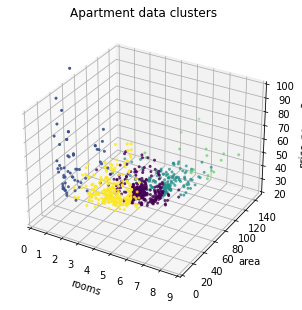

In [37]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['rooms'], df['area'], df['price_per_m2'], c=kmeans_apmts.labels_, s=4)

# Set title and axes labels
ax.set_title('Apartment data clusters', fontsize=12)
ax.set_xlabel('rooms', fontsize=10)
ax.set_ylabel('area', fontsize=10)
ax.set_zlabel('price_per_m2', fontsize=10)

# Set axes range
ax.set_xlim([0,9])
ax.set_ylim([0,150])
ax.set_zlim([20,100])

plt.show()
#weil es nur drei Variablen sind, kann man es in einem 3d-Modell darstellen : rooms, area and price_per_m2
#Farben sind die Cluster (aus dem k=5 (fünf Cluster))
# Man erkennt, eine klare Abgrenzung der Daten 80-100m2 , gelb: 2-4 Zimmer etc.
# Cluster funktionieren bei allen Daten , Cluster könnte man im Nachhinein genauer untersuchen
# hellgrün => ganz grosse wohnungen (in Ecke bei price_per_m2)
# nur nummerische werte aus Daten nehmen (Projekt) und dann anwenden!

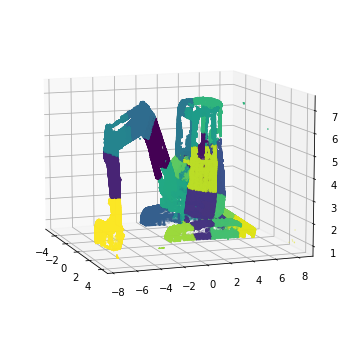

In [38]:
from plyfile import PlyData, PlyElement

def read_ply(filename):
    plydata = PlyData.read(filename)
    x = np.asarray(plydata.elements[0].data['x'])
    y = np.asarray(plydata.elements[0].data['y'])
    z = np.asarray(plydata.elements[0].data['z'])
    return np.stack([x,y,z], axis=1)

data = read_ply('excavator.ply')
x = data[:,0]
y = data[:,1]
z = data[:,2]

mask = z > 1.0

# Stack with x,y,z values
X4 = np.column_stack((x[mask], y[mask], z[mask]))

# Perform k-means clustering
k = 21
kmeans_cran = KMeans(n_clusters=k, random_state=42).fit(X4)

# 3D plot of image segmentation
plt.figure(figsize=(6,6))
ax = plt.axes(projection ='3d')
ax.view_init(10, -20)
ax.scatter(x[mask], y[mask], z[mask], c=kmeans_cran.labels_, s=0.05)
plt.show()

### Calculate the Silhouette Score

In [39]:
print(f'Silhouette Score: {silhouette_score(X3, kmeans_apmts.labels_):.4f}')

Silhouette Score: 0.4367


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [40]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-01-21 17:50:08
Python Version: 3.9.7
-----------------------------------
